# PYTHON CODE FOR LIVE PROJECT :

### Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

### Importing the dataset

In [2]:
data = pd.read_csv("Material Compressive Strength Experimental Data (1).csv")

### Eyeballing the dataset

In [3]:
data.shape

(6139, 9)

In [4]:
pd.set_option('display.max_columns', None)

data.head()

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Material Quantity (gm)      6030 non-null   float64
 1   Additive Catalyst (gm)      6030 non-null   float64
 2   Ash Component (gm)          6030 non-null   float64
 3   Water Mix (ml)              6030 non-null   float64
 4   Plasticizer (gm)            6030 non-null   float64
 5   Moderate Aggregator         6030 non-null   float64
 6   Refined Aggregator          6030 non-null   float64
 7   Formulation Duration (hrs)  6030 non-null   float64
 8   Compression Strength MPa    6139 non-null   float64
dtypes: float64(9)
memory usage: 431.8 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Material Quantity (gm),6030.0,383.642297,149.994316,124.44,256.0300,377.405,511.5225,658.80
Additive Catalyst (gm),6030.0,196.699846,133.329220,0.00,78.2100,192.320,307.6500,438.47
Ash Component (gm),6030.0,111.856252,74.241117,0.00,44.5825,115.250,174.2575,244.12
Water Mix (ml),6030.0,224.296955,41.545751,148.60,190.3875,225.700,257.4475,301.34
Plasticizer (gm),6030.0,17.651085,11.687965,0.00,7.9225,16.345,27.6675,39.28
Moderate Aggregator,6030.0,998.669332,97.732677,821.54,918.4375,997.985,1079.8275,1174.36
Refined Aggregator,6030.0,811.832398,112.813539,609.23,717.4475,810.260,905.8575,1018.05
Formulation Duration (hrs),6030.0,174.408504,112.415173,16.25,70.3000,163.105,272.6025,380.25
Compression Strength MPa,6139.0,56.851430,16.124932,2.61,47.0850,59.790,69.8450,92.51


### Checking Missing Values

In [7]:
data.isnull().sum()

Material Quantity (gm)        109
Additive Catalyst (gm)        109
Ash Component (gm)            109
Water Mix (ml)                109
Plasticizer (gm)              109
Moderate Aggregator           109
Refined Aggregator            109
Formulation Duration (hrs)    109
Compression Strength MPa        0
dtype: int64

### Checking Missing Values in individual columns

In [8]:
data[data["Material Quantity (gm)"].isnull()].index

Int64Index([  47,   55,  167,  314,  341,  426,  431,  443,  507,  509,
            ...
            5561, 5572, 5691, 5850, 5859, 5871, 6018, 6046, 6102, 6133],
           dtype='int64', length=109)

In [9]:
data[data["Additive Catalyst (gm)"].isnull()].index

Int64Index([  47,   55,  167,  314,  341,  426,  431,  443,  507,  509,
            ...
            5561, 5572, 5691, 5850, 5859, 5871, 6018, 6046, 6102, 6133],
           dtype='int64', length=109)

In [10]:
data[data["Ash Component (gm)"].isnull()].index 

Int64Index([  47,   55,  167,  314,  341,  426,  431,  443,  507,  509,
            ...
            5561, 5572, 5691, 5850, 5859, 5871, 6018, 6046, 6102, 6133],
           dtype='int64', length=109)

In [11]:
data[data["Water Mix (ml)"].isnull()].index 

Int64Index([  47,   55,  167,  314,  341,  426,  431,  443,  507,  509,
            ...
            5561, 5572, 5691, 5850, 5859, 5871, 6018, 6046, 6102, 6133],
           dtype='int64', length=109)

In [12]:
100 * data.isnull().sum() / len(data)

Material Quantity (gm)        1.775533
Additive Catalyst (gm)        1.775533
Ash Component (gm)            1.775533
Water Mix (ml)                1.775533
Plasticizer (gm)              1.775533
Moderate Aggregator           1.775533
Refined Aggregator            1.775533
Formulation Duration (hrs)    1.775533
Compression Strength MPa      0.000000
dtype: float64

* OBSERVATION:

It appears from the above code that, all the columns having missing rows are having same index. Which means the missing rows having null values are common for all the columns. So it doesn't make any sense to impute data for every single collumn when same rows are missing in every columns. It appears that these rows are purposely left blank. So it is wise to to drop these missing rows rather than imputing missing values. It will not harm us because missing rows are less than 2% of the tota rows.

### Dropping Missing Rows

In [13]:
data.shape

(6139, 9)

In [14]:
data = data.dropna()

In [15]:
data.shape

(6030, 9)

In [16]:
data.isnull().sum()

Material Quantity (gm)        0
Additive Catalyst (gm)        0
Ash Component (gm)            0
Water Mix (ml)                0
Plasticizer (gm)              0
Moderate Aggregator           0
Refined Aggregator            0
Formulation Duration (hrs)    0
Compression Strength MPa      0
dtype: int64

### EXPLORATORY DATA ANALYSIS

In [17]:
data.head()

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07


### Checking the relationship between independent and dependent columns

In [18]:
columns = data.columns.to_list()

In [19]:
def fun_plot(data):
    for i in columns[:-1]:
        plt.figure(figsize = (8,4), dpi = 100)
        sns.scatterplot(x = i , y = "Compression Strength MPa", data = data)
        plt.xlabel(i)
        plt.ylabel("Compression Strength MPa")

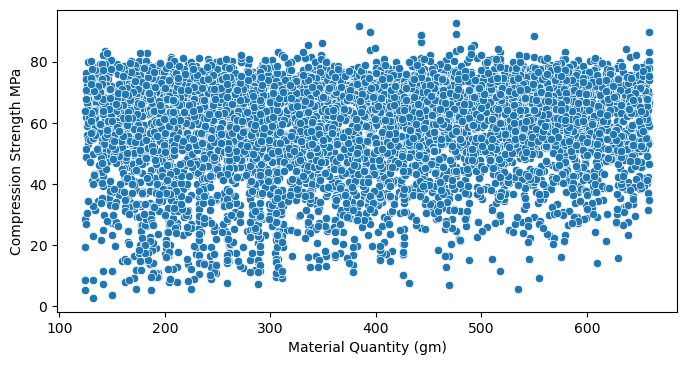

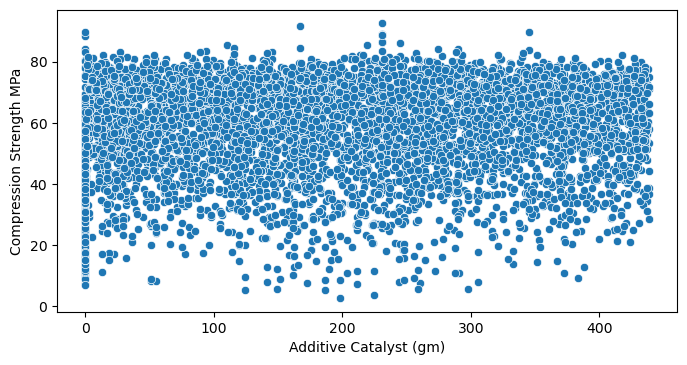

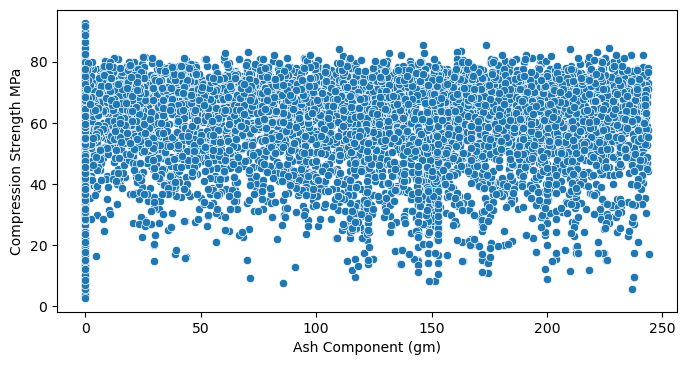

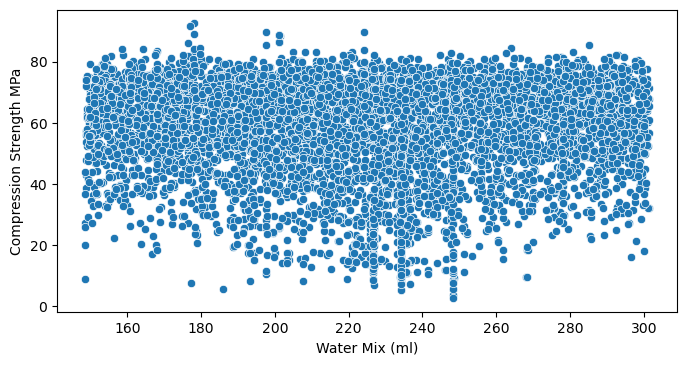

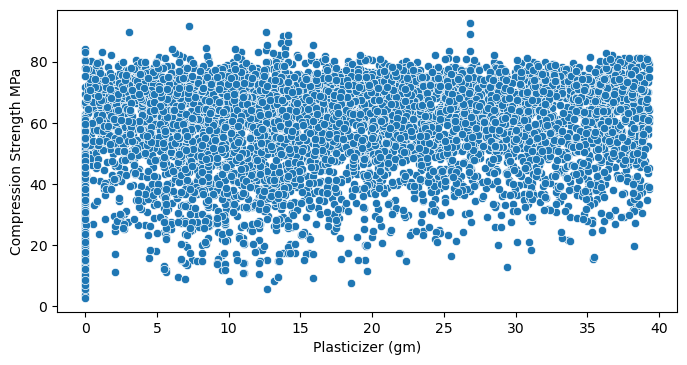

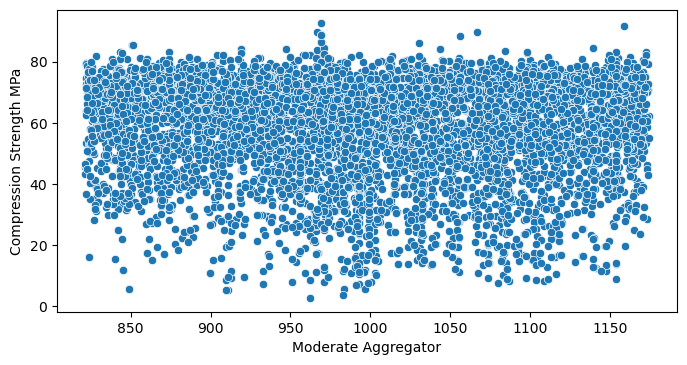

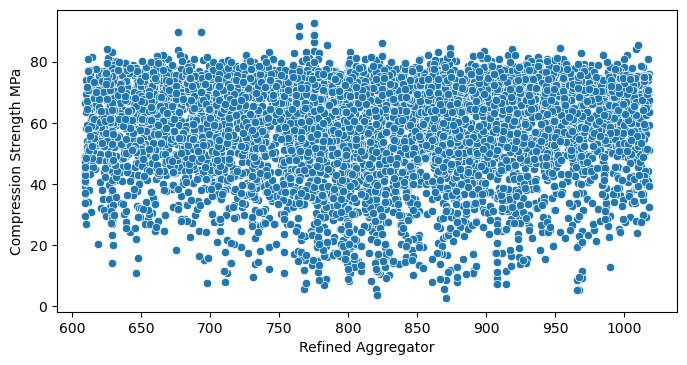

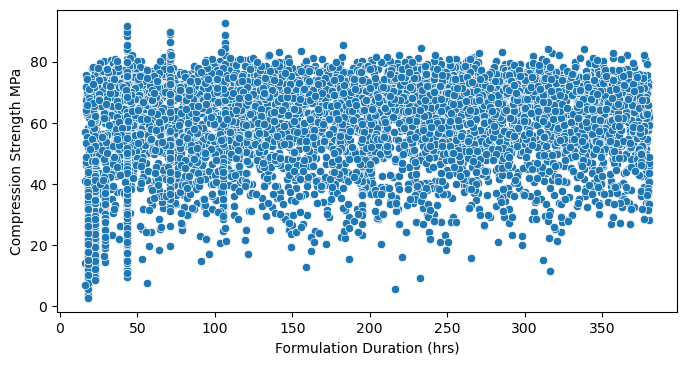

In [20]:
fun_plot(data)

Observation:

It appears that there is no Linear Relation between any of the independent variables that we have with the dependent variable.

### Checking For Outliers

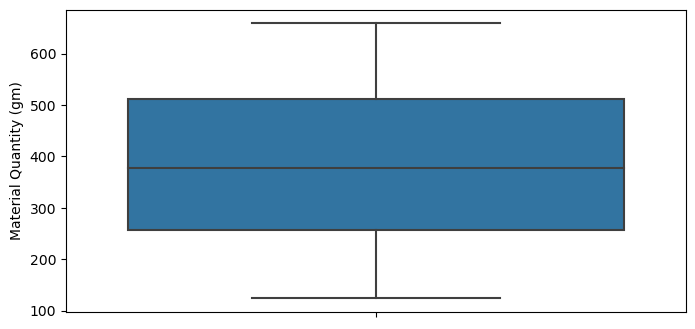

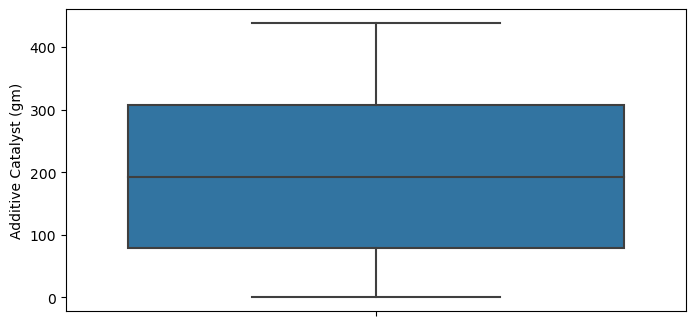

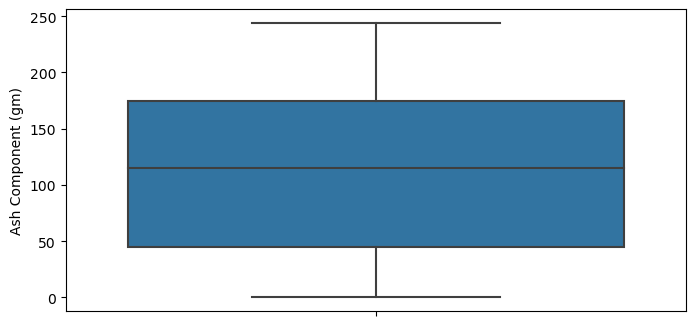

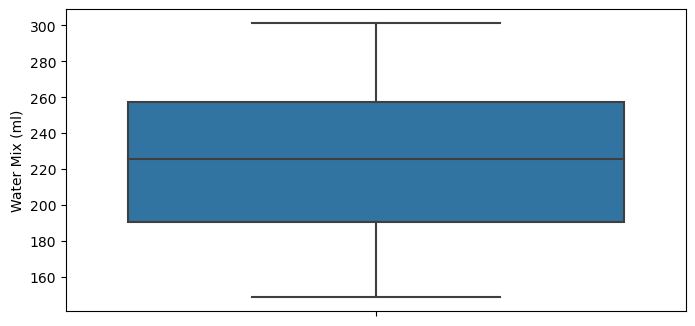

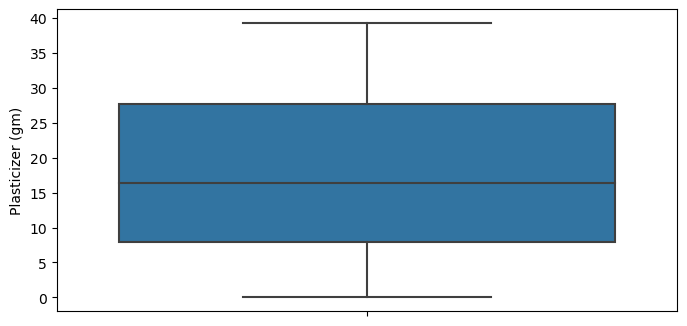

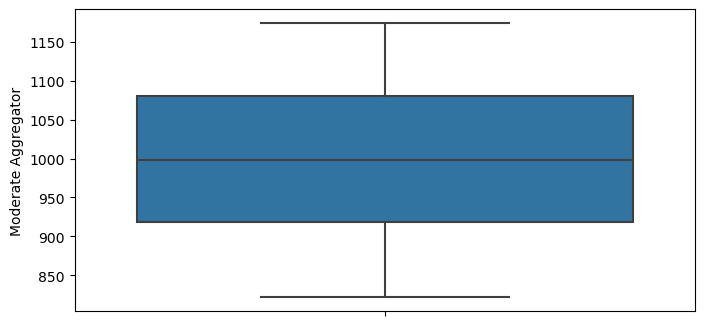

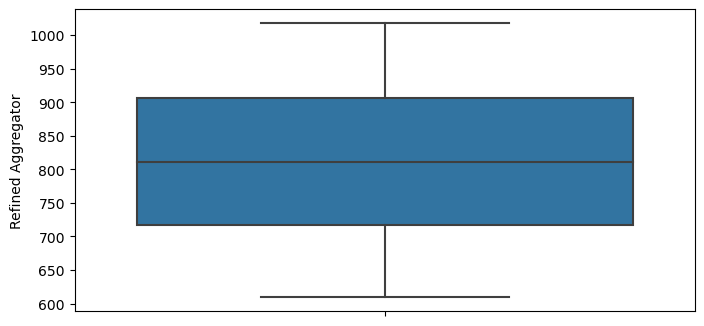

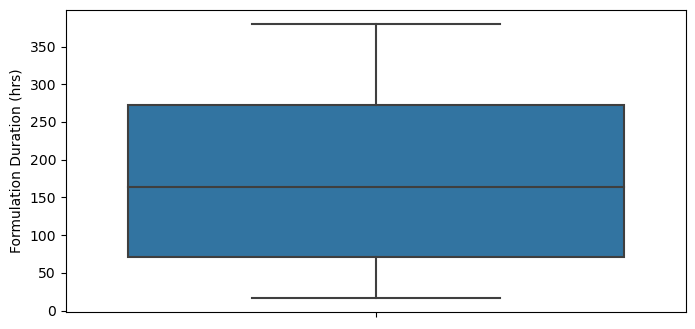

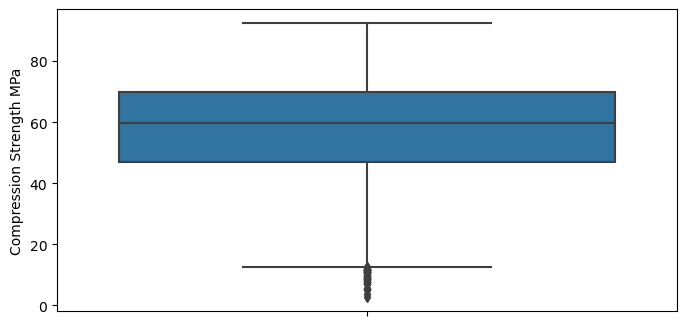

In [21]:
for i in columns:
    plt.figure(figsize = (8,4) , dpi = 100)
    sns.boxplot(y = i , data = data)

### Checking For Multi-Colliniarity

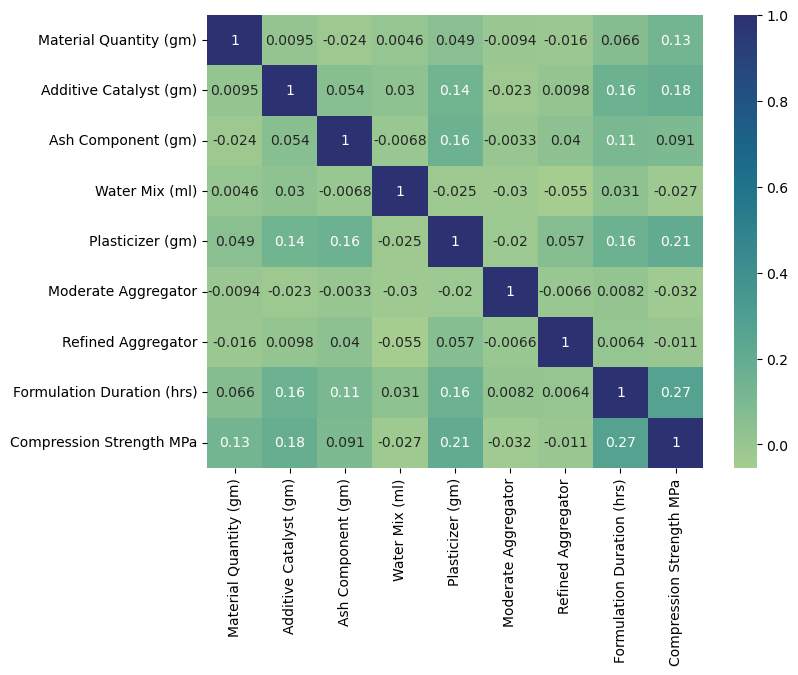

In [22]:
plt.figure(figsize = (8,6), dpi = 100)

sns.heatmap(data.corr(), cmap = "crest", annot=True);

Observation:

No Multi colinearity between the independent variables is observed

### Checking the distribution of each column

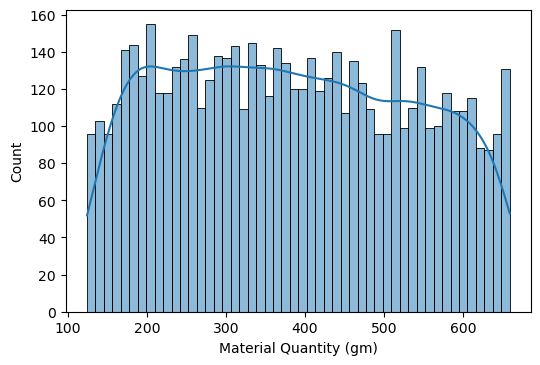

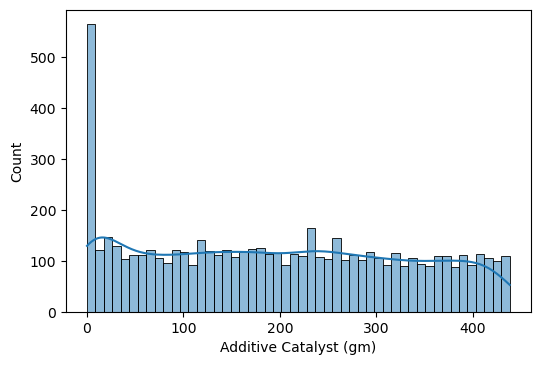

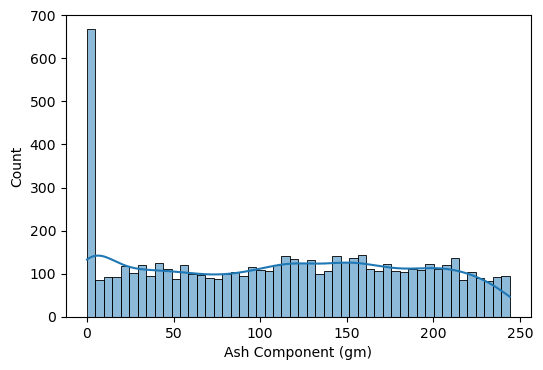

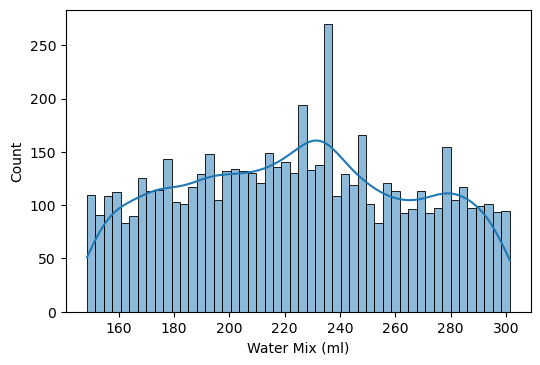

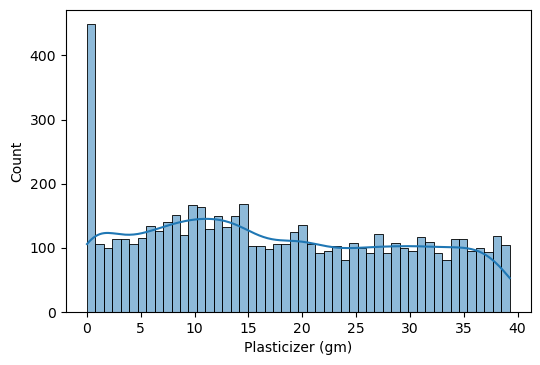

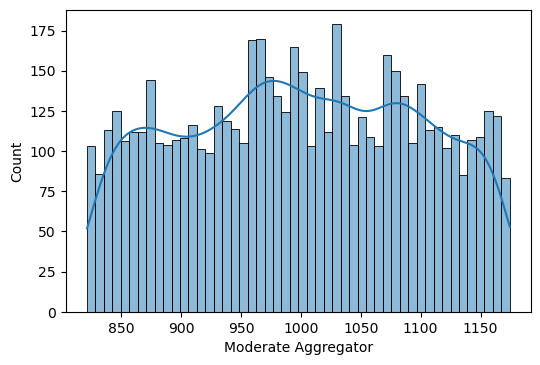

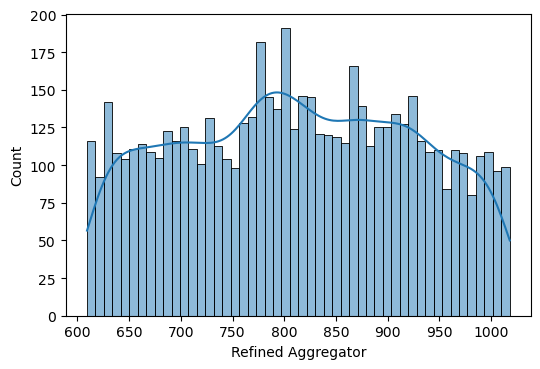

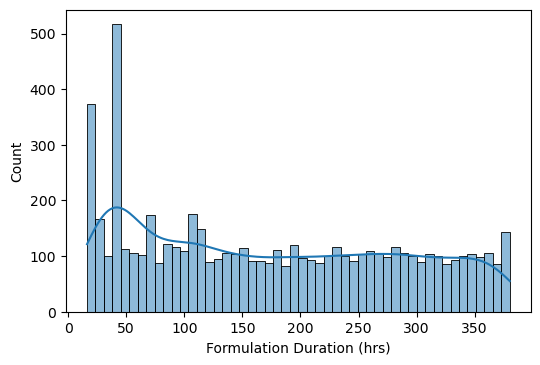

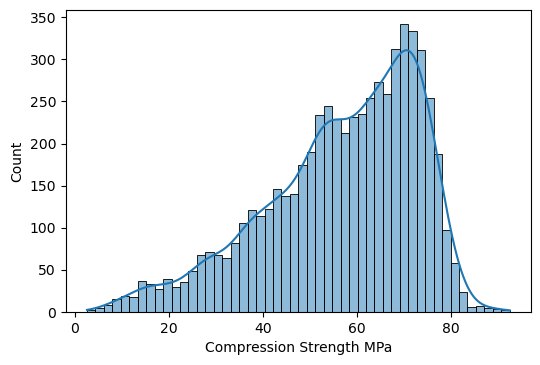

In [23]:
for i in columns:
    plt.figure(figsize = (6,4), dpi = 100)
    sns.histplot(x = i, data = data, kde = True, bins = 50);

### FEATURE SELECTION PROCESS:

In [24]:
data.head()

,Material Quantity (gm),Additive Catalyst (gm),Ash Component (gm),Water Mix (ml),Plasticizer (gm),Moderate Aggregator,Refined Aggregator,Formulation Duration (hrs),Compression Strength MPa
0,486.42,180.60,21.26,201.66,16.11,1151.17,708.50,344.43,79.89
1,133.32,260.14,185.60,175.99,6.27,1090.57,1010.25,28.86,59.80
2,559.97,2.84,111.76,295.23,11.95,1024.93,810.69,237.68,77.86
3,391.43,351.05,76.39,299.14,19.00,1134.88,881.34,208.81,71.74
4,394.78,352.61,194.35,235.54,17.02,1098.24,781.01,266.84,76.07


In [25]:
data.corr()["Compression Strength MPa"].sort_values(ascending=False)

Compression Strength MPa      1.000000
Formulation Duration (hrs)    0.268032
Plasticizer (gm)              0.207256
Additive Catalyst (gm)        0.180811
Material Quantity (gm)        0.130875
Ash Component (gm)            0.090961
Refined Aggregator           -0.010762
Water Mix (ml)               -0.027051
Moderate Aggregator          -0.032151
Name: Compression Strength MPa, dtype: float64

In [26]:
index = data.corr()["Compression Strength MPa"].sort_values(ascending=False).index[1:]

values = data.corr()["Compression Strength MPa"].sort_values(ascending=False).values[1:]

In [27]:
strong_correlation = pd.Series(index = index , data = values)

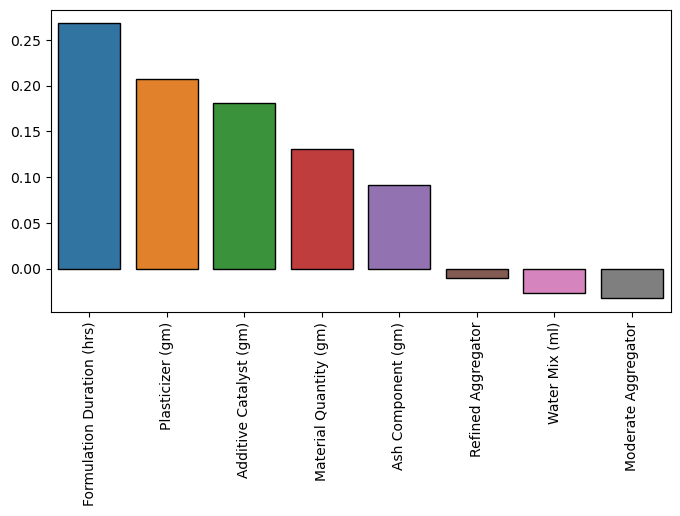

In [28]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(x = strong_correlation.index , y = strong_correlation.values, edgecolor = "black")

plt.xticks(rotation = 90);

Observation:
    
From above figure it can be observed that features like Refined Aggregator, Water Mix and Moderate Aggregator are not having sufficient strenght to predict target variable. So let's not consider these variables for our analysis.

In [29]:
X = data.drop(["Compression Strength MPa" , "Refined Aggregator", "Water Mix (ml)" , "Moderate Aggregator"] , axis = 1)

y = data["Compression Strength MPa"]

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score

### Creating a function to avoid repeatitive task

In [33]:
scores_of_diff_models = []

def model_selection(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test , y_pred)
    scores_of_diff_models.append(score)
    
    print("r2_score is : " , 100 * score)
    

### 1. Linear Regression Model

In [34]:
model = LinearRegression()

model_selection(model)

r2_score is :  12.519145546925225


### 2. Decision Tree

In [35]:
model = DecisionTreeRegressor()

model_selection(model)

r2_score is :  -12.131270876088251


### 3. Random Forest Model

In [36]:
model = RandomForestRegressor()

model_selection(model)

r2_score is :  39.02171818204694


### 4. Gradient Boosting Model

In [37]:
model = GradientBoostingRegressor()

model_selection(model)

r2_score is :  40.11783134728365


### Checking Important features in GBM

In [54]:
model.feature_importances_

array([0.16461176, 0.15647217, 0.02859791, 0.19672115, 0.45359701])

In [55]:
model.feature_names_in_

array(['Material Quantity (gm)', 'Additive Catalyst (gm)',
       'Ash Component (gm)', 'Plasticizer (gm)',
       'Formulation Duration (hrs)'], dtype=object)

In [57]:
imp_feat = dict(zip(model.feature_names_in_ , model.feature_importances_ ))

In [58]:
imp_features = pd.Series(imp_feat)

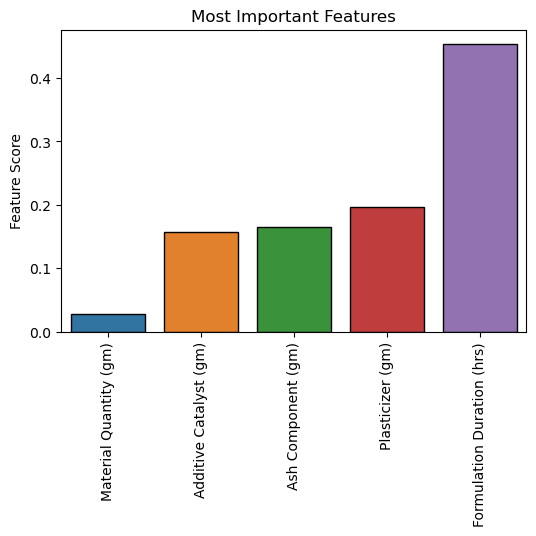

In [61]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(x = imp_features.index, y = sorted(imp_features.values), edgecolor = "black")

plt.ylabel("Feature Score")

plt.title("Most Important Features")

plt.xticks(rotation = 90);

### Observation:

From the avove Feature Importance Plot it is evident that the most important features are Formulation Duration, Plasticizer, Ash Component and Additive Catalyst.


### Ploting Models Performance

In [38]:
scores_achieved = {'Linear_Regression' : 100 * scores_of_diff_models[0],
                  'Decission_Tree' : 100 * scores_of_diff_models[1],
                  'Random_Forest' : 100 * scores_of_diff_models[2],
                  'Gradient_Boosting' :100 * scores_of_diff_models[3]}

In [39]:
model_wise_score = pd.Series(scores_achieved)

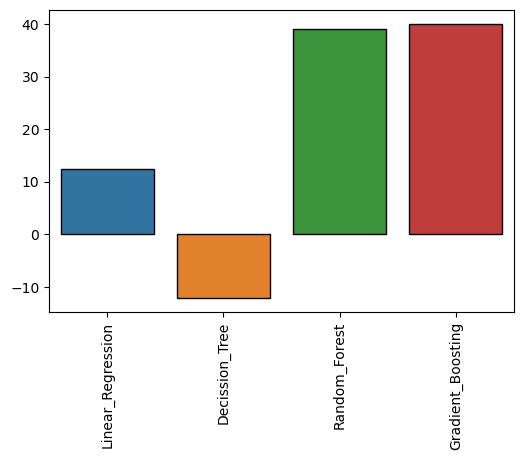

In [40]:
plt.figure(figsize = (6,4) , dpi = 100)

sns.barplot(x = model_wise_score.index, y = model_wise_score.values, edgecolor = "black")

plt.xticks(rotation = 90);

### Observation

From above plot it is evident that from all the above different model Gradient Boosting Model is having the highest r2 score of 40%. However, this score is much lower for the model to be pushed further for the deployment. However, assuming that the dataset itself is not good to be used for ML modeling we will accept the Gradient Boosting Model having highest r2_score among other models and hence deploy Gradient Boosting Model. 